# Dataset 1: articles_dataset.csv

#### a. Import required libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import library
import os
import random
import re
import string

import nltk
import numpy as np
import pandas as pd

from gensim.models import Word2Vec

from nltk import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

nltk.download("stopwords")

SEED = 42
random.seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)
np.random.seed(SEED)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#### b. Data Preprocessing

In [ ]:
import pandas as pd
df = pd.read_csv("./drive/MyDrive/STBI/Proyek/Dataset/articles_data.csv")
df.head()

,Unnamed: 0,source_id,source_name,author,title,description,url,url_to_image,published_at,content,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count
0,0,reuters,Reuters,Reuters Editorial,NTSB says Autopilot engaged in 2018 California...,The National Transportation Safety Board said ...,https://www.reuters.com/article/us-tesla-crash...,https://s4.reutersmedia.net/resources/r/?m=02&...,2019-09-03T16:22:20Z,WASHINGTON (Reuters) - The National Transporta...,0.0,0.0,0.0,2528.0,0.0
1,1,the-irish-times,The Irish Times,Eoin Burke-Kennedy,Unemployment falls to post-crash low of 5.2%,Latest monthly figures reflect continued growt...,https://www.irishtimes.com/business/economy/un...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T10:32:28Z,The States jobless rate fell to 5.2 per cent l...,0.0,6.0,10.0,2.0,0.0
2,2,the-irish-times,The Irish Times,Deirdre McQuillan,"Louise Kennedy AW2019: Long coats, sparkling t...",Autumn-winter collection features designer’s g...,https://www.irishtimes.com/\t\t\t\t\t\t\t/life...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T14:40:00Z,Louise Kennedy is showing off her autumn-winte...,1.0,NaN,NaN,NaN,NaN
3,3,al-jazeera-english,Al Jazeera English,Al Jazeera,North Korean footballer Han joins Italian gian...,Han is the first North Korean player in the Se...,https://www.aljazeera.com/news/2019/09/north-k...,https://www.aljazeera.com/mritems/Images/2019/...,2019-09-03T17:25:39Z,"Han Kwang Song, the first North Korean footbal...",0.0,0.0,0.0,7.0,0.0
4,4,bbc-news,BBC News,BBC News,UK government lawyer says proroguing parliamen...,"The UK government's lawyer, David Johnston arg...",https://www.bbc.co.uk/news/av/uk-scotland-4956...,https://ichef.bbci.co.uk/news/1024/branded_new...,2019-09-03T14:39:21Z,NaN,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.shape

(10437, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10437 entries, 0 to 10436
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       10437 non-null  int64  
 1   source_id                        10437 non-null  object 
 2   source_name                      10437 non-null  object 
 3   author                           9417 non-null   object 
 4   title                            10435 non-null  object 
 5   description                      10413 non-null  object 
 6   url                              10436 non-null  object 
 7   url_to_image                     9781 non-null   object 
 8   published_at                     10436 non-null  object 
 9   content                          9145 non-null   object 
 10  top_article                      10435 non-null  float64
 11  engagement_reaction_count        10319 non-null  float64
 12  engagement_comment

In [ ]:
# drop atribut 
df = df.drop(['Unnamed: 0', 'source_id', 'title', 'description', 'source_name', 'author', 'url', 'url_to_image', 'published_at', 'top_article', 'engagement_reaction_count', 'engagement_comment_count', 'engagement_share_count', 'engagement_comment_plugin_count'], axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10437 entries, 0 to 10436
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  9145 non-null   object
dtypes: object(1)
memory usage: 81.7+ KB


In [ ]:
# Checking duplicate value
print(str(df.describe(include=object)))

                                                  content
count                                                9145
unique                                               8385
top     Chat with us in Facebook Messenger. Find out w...
freq                                                  125


In [ ]:
# remove duplicate value (text) in contenct attribute
df.drop_duplicates(subset=['content'], keep='last')

,content
1,The States jobless rate fell to 5.2 per cent l...
2,Louise Kennedy is showing off her autumn-winte...
3,"Han Kwang Song, the first North Korean footbal..."
5,"""This Tender Land: a Novel"" (Atria Books), by ..."
6,LONDON (Reuters) - The European Union is waiti...
...,...
10429,For his latest installation of the SCAR Projec...
10431,There are numerous bargains waiting to be pick...
10432,Growth in the U.S. economys vast services sect...
10433,ZURICH/HONG KONG (Reuters) - The announcement ...


In [ ]:
# Checking null value in attribute 
df.isna().sum()

content    1292
dtype: int64

In [ ]:
#drop null value
data = df.dropna()


In [ ]:
df

,content
0,WASHINGTON (Reuters) - The National Transporta...
1,The States jobless rate fell to 5.2 per cent l...
2,Louise Kennedy is showing off her autumn-winte...
3,"Han Kwang Song, the first North Korean footbal..."
4,NaN
...,...
10432,Growth in the U.S. economys vast services sect...
10433,ZURICH/HONG KONG (Reuters) - The announcement ...
10434,NaN
10435,NaN


In [ ]:
#saving the result
data.to_csv("./drive/MyDrive/STBI/Proyek/Dataset/clean_articles_data_word2vec.csv", index=True)

#### C. Text Preprocessing

In [ ]:
# remove punctuation
def punctuation(txt):
  return re.sub(r"[^\w\s]","", str(txt))

data['content'] = data['content'].apply(punctuation)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
import nltk
nltk.download('punkt')
# tokenization
def word_tokenize_wrapper(text):
  return word_tokenize(text)
data['content'] = data['content'].apply(word_tokenize_wrapper)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#stopword removal
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw_nltk = stopwords.words('english')
print(sw_nltk)
def stopword(text):
  words = [word for word in text if word.lower() not in sw_nltk]
  return words
data['content'] = data['content'].apply(stopword)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
#normalization
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
def lemma(text):
  lemmatizer = WordNetLemmatizer()
  Output= [lemmatizer.lemmatize(words_sent) for words_sent in text]
  return Output
data['content'] = data['content'].apply(lemma)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#saving the rusult
data.to_csv("./drive/MyDrive/STBI/Proyek/Dataset/prepro_articles_data_word2vec.csv", index=True)

In [ ]:
data

,content
0,"[WASHINGTON, Reuters, National, Transportation..."
1,"[States, jobless, rate, fell, 52, per, cent, l..."
2,"[Louise, Kennedy, showing, autumnwinter, colle..."
3,"[Han, Kwang, Song, first, North, Korean, footb..."
5,"[Tender, Land, Novel, Atria, Books, William, K..."
...,...
10428,"[last, week, Disney, Magic, arrived, New, York..."
10429,"[latest, installation, SCAR, Project, photogra..."
10431,"[numerous, bargain, waiting, picked, stock, ma..."
10432,"[Growth, US, economy, vast, service, sector, s..."


#### D. TF-IDF

In [ ]:
# untuk tf-idf
import pandas as pd
data = pd.read_csv("./drive/MyDrive/STBI/Proyek/Dataset/prepro_articles_data_word2vec.csv")
data.head()

,Unnamed: 0,content
0,0,"['WASHINGTON', 'Reuters', 'National', 'Transpo..."
1,1,"['States', 'jobless', 'rate', 'fell', '52', 'p..."
2,2,"['Louise', 'Kennedy', 'showing', 'autumnwinter..."
3,3,"['Han', 'Kwang', 'Song', 'first', 'North', 'Ko..."
4,5,"['Tender', 'Land', 'Novel', 'Atria', 'Books', ..."


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tfidf(df):
    tfidf = TfidfVectorizer( stop_words='english',use_idf=True)
    tfidf_matrix = tfidf.fit_transform(df)
    return tfidf_matrix

In [ ]:
# Let's create a matrix with tfidf for the column abstract
tfidf_matrix = tfidf(data['content'].values.astype('U'))

In [ ]:
# in order to explore which documents have more similar respresentaiton, consine simliartiy can be used
from sklearn.metrics.pairwise import linear_kernel
cosine_similarities = linear_kernel(tfidf_matrix[0:1], tfidf_matrix).flatten()

# 10 most related documents indices
related_docs_indices = cosine_similarities.argsort()[:-11:-1]
print("Related Document:",related_docs_indices)

# Cosine Similarties of related documents
print("Cosine Similarites of related documents",cosine_similarities[related_docs_indices])

Related Document: [   0  123  430 1017 7890 8156 4561 1993 1488 8725]
Cosine Similarites of related documents [1.         1.         0.84414205 0.400582   0.25930562 0.24978156
 0.18057069 0.17938675 0.17849513 0.17281567]


In [ ]:
# Let's take a look at two most similar document
data.iloc[1]['content']

"['States', 'jobless', 'rate', 'fell', '52', 'per', 'cent', 'last', 'month', 'according', 'latest', 'official', 'figure', 'higher', 'previously', 'reported', 'account', 'upward', 'revision', 'Central', 'Statistics', 'Office', 'CSO', 'one', 'several', 'last', 'two', 'year', 'Nonethe', '800', 'char']"

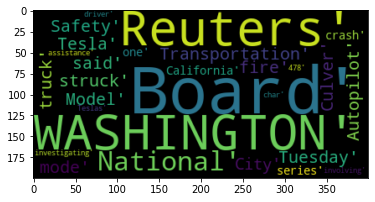

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate(data.iloc[0]['content'])
plt.imshow(wordcloud, interpolation="bilinear")

#### E. Evalution

In [ ]:
def AveragePrecission(data):
    hasil = 0
    k = 1
    for i in range(len(data)):
        hasil +=  (k / data[i-1].get("content"))
        k += 1   
    if len(dict) > 0:
        return hasil/len(data)
    else:
        return 0
            
    

def MeanAveragePrecission():
    ct = 0
    ans = 0
    jumlah_result = 10
    for i in range (10):
        ct = result[i-1]
        ans += AveragePrecission(ct)
        print("result :", i, "\tAverage Precission :", AveragePrecission(ct))

    print("\nTotal Mean Average Precission :", ans/jumlah_result)